# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.082085e+01     6.321176e+00
 * time: 0.0052509307861328125
     1     2.747219e+01     5.560227e+00
 * time: 0.017116069793701172
     2     2.175493e+01     7.509903e+00
 * time: 0.044363975524902344
     3     1.339324e+01     2.086220e+00
 * time: 0.07407188415527344
     4     1.079544e+01     1.219166e+00
 * time: 0.09841799736022949
     5     1.011639e+01     1.041363e+00
 * time: 0.12190699577331543
     6     9.702787e+00     1.439813e+00
 * time: 0.14104390144348145
     7     9.382320e+00     8.477927e-01
 * time: 0.16014504432678223
     8     9.160787e+00     6.155214e-01
 * time: 0.17901992797851562
     9     9.013699e+00     3.210404e-01
 * time: 0.19839000701904297
    10     8.961934e+00     8.667421e-01
 * time: 0.21316003799438477
    11     8.909745e+00     1.025569e+00
 * time: 0.22852802276611328
    12     8.811553e+00     6.175530e-01
 * time: 0.2440330982208252
    13     8.735464e+00     4.520421e-01
 * ti

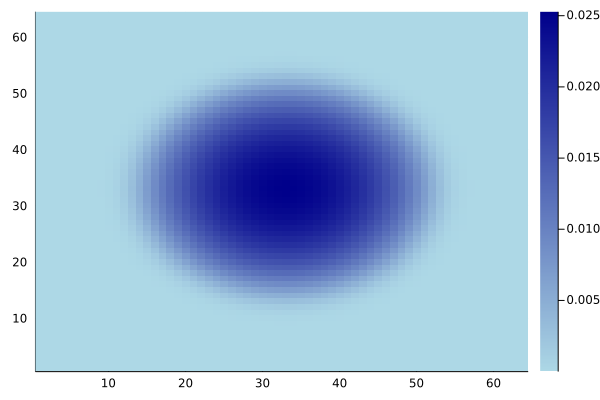

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)